In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import smogn

In [60]:
df = pd.read_csv('features.csv')

x = df.drop(columns=['target', 'Medu', 'health', 'Dalc', 'Walc', 'traveltime', 'Mjob', 'internet',
                     'Pstatus', 'goout', 'Fjob', 'guardian', 'activities'], axis=1)
y = df['target']

df_smogn = x.copy()
df_smogn['target'] = y

df_resampled = smogn.smoter(data=df_smogn, y='target')

X_resampled = df_resampled.drop(columns='target')
y_resampled = df_resampled['target']

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

r_index: 100%|#################################| 64/64 [00:00<00:00, 693.45it/s]


In [61]:
mlp = MLPRegressor(hidden_layer_sizes=(121,),
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42)

mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 9.6196
R²: 0.6386


/home/vkzy/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [62]:
y_train_pred = mlp.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f'Treino -> MSE: {mse_train:.4f}, R²: {r2_train:.4f}')
print(f'Teste  -> MSE: {mse:.4f}, R²: {r2:.4f}')

Treino -> MSE: 4.2375, R²: 0.7956
Teste  -> MSE: 9.6196, R²: 0.6386


<Axes: title={'center': 'Importância das Features'}>

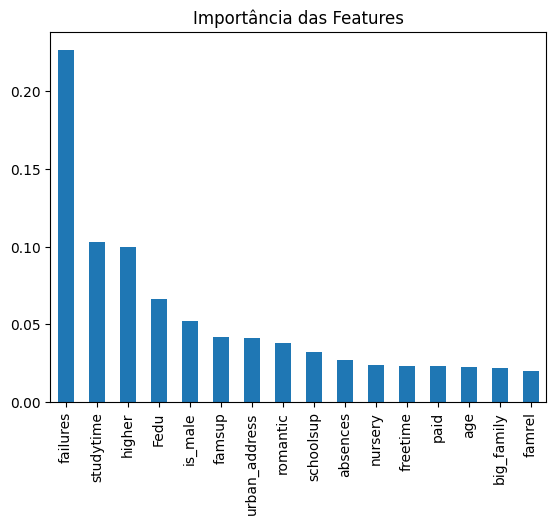

In [26]:
result = permutation_importance(mlp, X_test_scaled, y_test, n_repeats=10, random_state=42)

importances = pd.Series(result.importances_mean, index=X_test.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Importância das Features')

In [17]:
resultados = pd.DataFrame({'Real': y_test.values, 'Predito': y_pred})
print(resultados)

     Real    Predito
0      19  12.016511
1      12  12.656624
2      18  15.088667
3      11  11.901462
4      11  13.111808
..    ...        ...
125     7  12.445039
126    17  14.342459
127    11  12.563409
128    12  13.543928
129    10  11.507313

[130 rows x 2 columns]
